## 1 a)

In [1]:
import numpy as np

# a)
rows = 8
cols = 5
start_value = 1.0

arr = np.arange(start_value, start_value + 0.5 * rows * cols, 0.5).reshape(
    rows, cols
)


## 1 b)

In [2]:
# b)
int_mask = np.mod(arr, 1) == 0
print(int_mask)

[[ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]
 [ True False  True False  True]
 [False  True False  True False]]


In [3]:
# c)
# Find indexes
arr_flat = np.ravel(arr)
mask_flat = np.ravel(int_mask)
indexes = []
for idx, el in enumerate(mask_flat):
    if el:
        indexes.append(idx)

print(indexes)
ints = np.take(arr_flat, indexes)

# Split into two
s1, s2 = np.split(ints, 2)
print(s1)
print(s2)

# d)
# Row-wise mean
row_mean = np.mean(arr, axis=1)
print(row_mean)

# Column-wise mean
col_mean = np.mean(arr, axis=0)
print(col_mean)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
[ 2.   4.5  7.   9.5 12.  14.5 17.  19.5]
[ 9.75 10.25 10.75 11.25 11.75]


## 2 a)

In [4]:
import numpy as np

# Create an RNG instance with the seed set to 101
rng = np.random.default_rng(101)

mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.0], [0.0, 10.0]])

# Create our multivariate normal distribution with a sample size of 2000
samples = rng.multivariate_normal(mean, cov, 2000, check_valid="raise")

print(samples)
print(samples.T.shape)

# samples = np.load("backup_data_2a.npy")
# print(data)
# print(data.mean())

[[-2.03462548 -2.4986816 ]
 [ 0.74429453  1.90780764]
 [ 0.36732137 -0.97931565]
 ...
 [-1.61478996 -2.8893203 ]
 [ 0.71492655  2.09009495]
 [-1.63870986 -4.12375119]]
(2, 2000)


## 2 b)

In [5]:
def get_rotation_matrix(theta):
    """
    Return a 2x2 rotation matrix for a given radian angle `theta`.
    """
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[c, -s], [s, c]])


theta = np.radians(40)

r_matrix = get_rotation_matrix(theta)
samples_rotated = samples @ r_matrix

## 2 c)

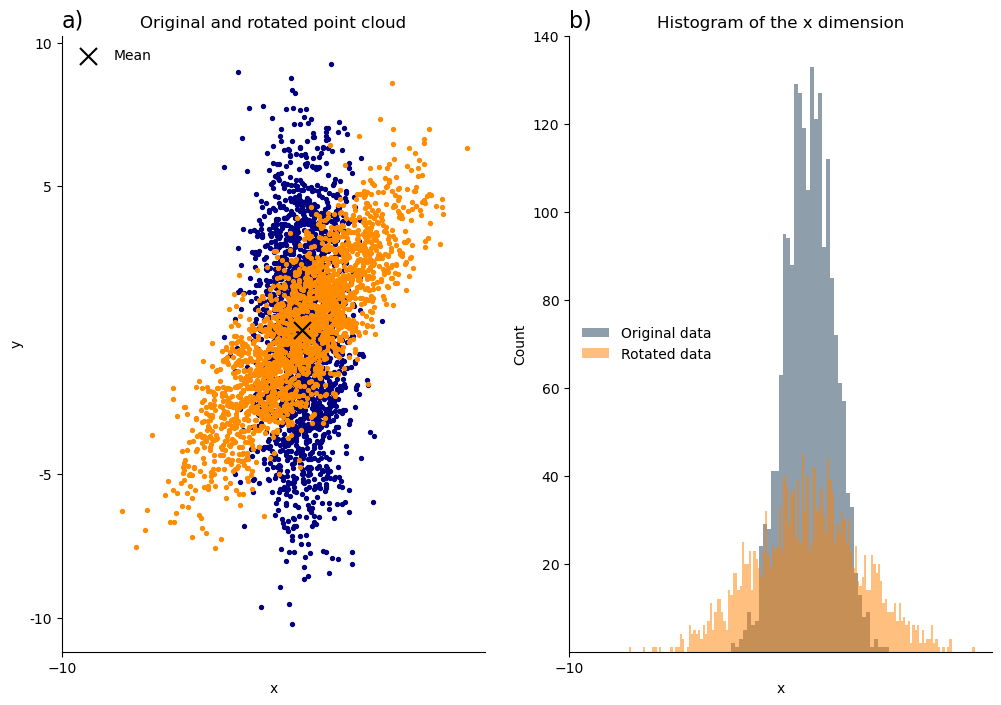

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def configure_axis(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("x")
    ax.xaxis.set_ticks([tick for tick in ax.get_xticks() if tick % 5 == 0 and tick != 0])
    ax.yaxis.set_ticks([tick for tick in ax.get_yticks() if tick % 5 == 0 and tick != 0])
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot scatter data
axes[0].scatter(samples[:, 0], samples[:, 1], s=8, color="navy")
axes[0].scatter(samples_rotated[:, 0], samples_rotated[:, 1], s=8, color="darkorange")
mean_axs = axes[0].scatter(0, 0, marker="x", s=150, color="black", label="Mean")
# Configure first axis
configure_axis(axes[0])
axes[0].set_ylabel("y")
axes[0].set_title("a)", fontsize=16, loc="left")
axes[0].set_title("Original and rotated point cloud")
axes[0].legend(loc="upper left", frameon=False)

# Plot histogram data
#orig_data = axes[1].hist(samples[:, 0], bins=111, fc=(1, 0.5, 0, 0.5), zorder=1, label="Original data")
orig_data = axes[1].hist(samples[:, 0], bins=40, fc=(0.118, 0.25, 0.35, 0.5),  label="Original data")
rot_data = axes[1].hist(samples_rotated[:, 0], bins=150, fc=(1, 0.5, 0, 0.5), label="Rotated data")
#rot_data = axes[1].hist(samples_rotated[:, 0], bins=111, fc=(0.118, 0.25, 0.35, 0.5), zorder=0, label="Rotated data")
# Configure second axis
configure_axis(axes[1])
axes[1].set_ylabel("Count")
axes[1].set_title("b)", fontsize=16, loc="left")
axes[1].set_title("Histogram of the x dimension")
axes[1].legend(loc="center left", frameon=False)

plt.show()